In [27]:

import cv2


In [25]:
import os

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [7]:
mnist = tf.keras.datasets.mnist

In [8]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [9]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [11]:
model = tf.keras.models.Sequential()

In [13]:
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128,activation = 'relu'))

In [14]:
model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

In [17]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [19]:
model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1019 - accuracy: 0.9686
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0694 - accuracy: 0.9782
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0521 - accuracy: 0.9832


In [20]:
model.save('Handwritten.model')

INFO:tensorflow:Assets written to: Handwritten.model\assets


INFO:tensorflow:Assets written to: Handwritten.model\assets


In [22]:
model = tf.keras.models.load_model('Handwritten.model')

In [23]:
loss,accuracy  = model.evaluate(x_test,y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0949 - accuracy: 0.9729
0.09486124664545059 0.9728999733924866


1/1 [==============================] - 0s 31ms/step
3


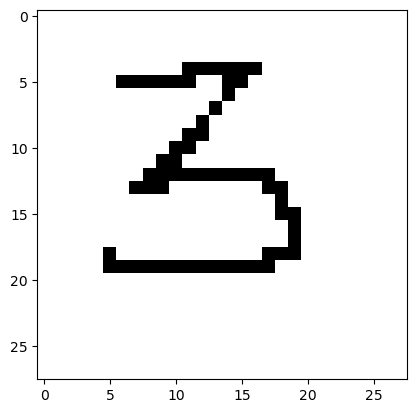

1/1 [==============================] - 0s 31ms/step
3


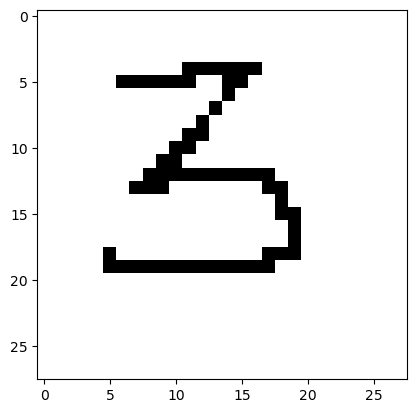

1/1 [==============================] - 0s 32ms/step
2


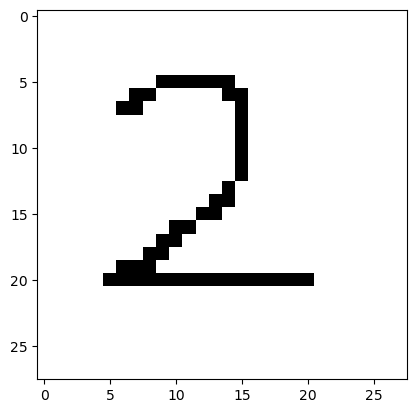

In [32]:
image_num = 1
while os.path.isfile(f"Digit{image_num}.png"):
    try:
        img = cv2.imread(f"Digit{image_num}.png")[:,:,0]
        img = np.invert(np.array([img]))
        pred = model.predict(img)
        print(np.argmax(pred))
        plt.imshow(img[0],cmap = plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_num += 1